In [1]:
import math as maths

import cartopy.crs as ccrs
import cartopy.feature as cf
import intake
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh
import os

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
cat = intake.open_catalog('https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml')['online']

In [39]:
# icon_d3hp003
# - 2 days
# - zoom 11
# - inst wa at 15M

icon_aug = cat['icon_d3hp003aug'](zoom=10, time='PT15M').to_dask().pipe(egh.attach_coords)
# icon_feb = cat['icon_d3hp003feb'](zoom=10, time='PT15M').to_dask().pipe(egh.attach_coords)

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [18]:
ral3 = cat['um_glm_n2560_RAL3p3'](zoom=10, time='PT3H').to_dask().pipe(egh.attach_coords)
ral3 = ral3.sel(time=slice('2020-4', None)) # drop out first 2 months

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 44TB
Dimensions:   (time: 2921, pressure: 25, cell: 12582912)
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 23kB 2020-04-01 ... 2021-04-01
    crs       int64 8B 0
  * cell      (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat       (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon       (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Data variables: (12/14)
    cli       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    clw       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    hur       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    hus       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    qg        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    qr        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    ...        ...
    ua        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    va        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    wa        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    zg        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    orog      (cell) float64 101MB dask.array<chunksize=(98304,), meta=np.ndarray>
    sftlf     (cell) float64 101MB dask.array<chunksize=(98304,), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

In [36]:
d = ral3.isel(time=24)

In [37]:
d = icon_feb.isel(time=24)

In [5]:
### view Himalayas at 1000 hPa

In [6]:
d.pressure

<xarray.DataArray 'pressure' (pressure: 30)> Size: 240B
array([     5,     10,     20,     50,    100,    200,    500,   1000,   2000,
         3000,   5000,   7000,  10000,  15000,  20000,  25000,  30000,  40000,
        50000,  60000,  70000,  75000,  80000,  85000,  87500,  90000,  92500,
        95000,  97500, 100000])
Coordinates:
  * pressure  (pressure) int64 240B 5 10 20 50 100 ... 92500 95000 97500 100000
    time      datetime64[ns] 8B 2020-02-01T06:15:00
    crs       int64 8B 0
Attributes:
    axis:           Z
    long_name:      generalized_height
    positive:       up
    standard_name:  height

In [38]:
d.isel(pressure=slice(0,2))

<xarray.Dataset> Size: 2GB
Dimensions:   (pressure: 2, cell: 12582912)
Coordinates:
  * pressure  (pressure) int64 16B 5 10
    time      datetime64[ns] 8B 2020-02-01T06:15:00
    crs       int64 8B 0
  * cell      (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    lat       (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon       (cell) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
Data variables: (12/18)
    hur       (pressure, cell) float32 101MB ...
    hus       (pressure, cell) float32 101MB ...
    orog      (cell) float32 50MB ...
    pr        (cell) float32 50MB ...
    psl       (cell) float32 50MB ...
    qall      (pressure, cell) float32 101MB ...
    ...        ...
    ua        (pressure, cell) float32 101MB ...
    uas       (cell) float32 50MB ...
    va        (pressure, cell) float32 101MB ...
    vas       (cell) float32 50MB ...
    wa        (pressure, cell) float32 101MB ...
    zg        (pressure, cell) float32 101MB ...

<Figure size 640x480 with 0 Axes>

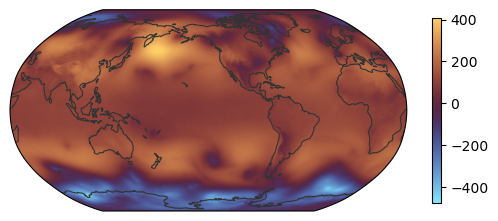

In [20]:
cb = egh.healpix_show(d.sel(pressure=1000).zg, cmap='managua_r', )
plt.colorbar(cb, shrink=.5)

<Figure size 640x480 with 0 Axes>

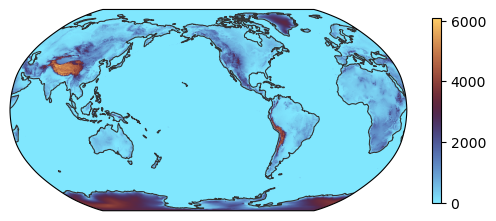

In [21]:
cb = egh.healpix_show(d.sel(pressure=1000).orog, cmap='managua_r', )
plt.colorbar(cb, shrink=.5)

<Figure size 640x480 with 0 Axes>

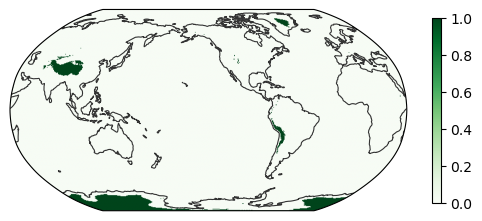

In [23]:
# below ground?
plev = 700
below_ground = d.orog > d.sel(pressure=plev).zg
cb = egh.healpix_show(below_ground, cmap='Greens', )
plt.colorbar(cb, shrink=.5)

<Figure size 640x480 with 0 Axes>

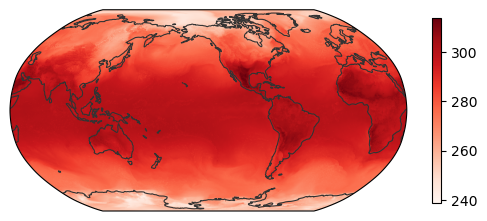

In [25]:
# temps
cb = egh.healpix_show(d.ta.sel(pressure=1000), cmap='Reds', )
plt.colorbar(cb, shrink=.5)

In [33]:
# masked out
above_only = d.wa.where(~(d.zg < d.orog))

<Figure size 640x480 with 0 Axes>

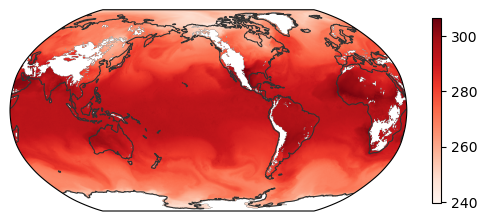

In [27]:
cb = egh.healpix_show(above_only.sel(pressure=900), cmap='Reds', )
plt.colorbar(cb, shrink=.5)

In [4]:
### checking levels for ICON

In [51]:
d = icon_feb.isel(time=10, cell=slice(1000,1100)).sel(pressure=slice(10000,100000))

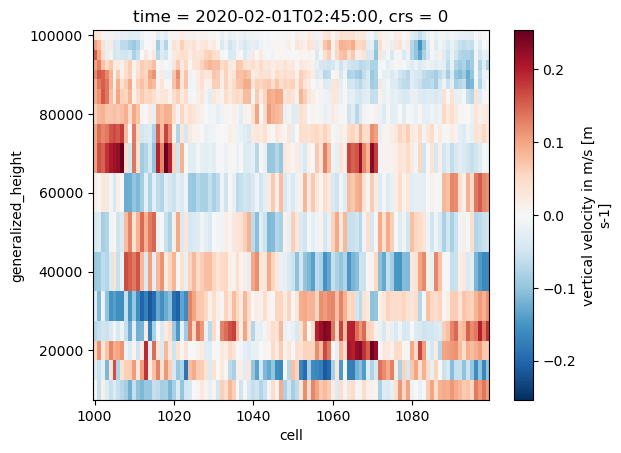

In [42]:
d.wa.plot()

In [43]:
wmax = d.wa.max('pressure')

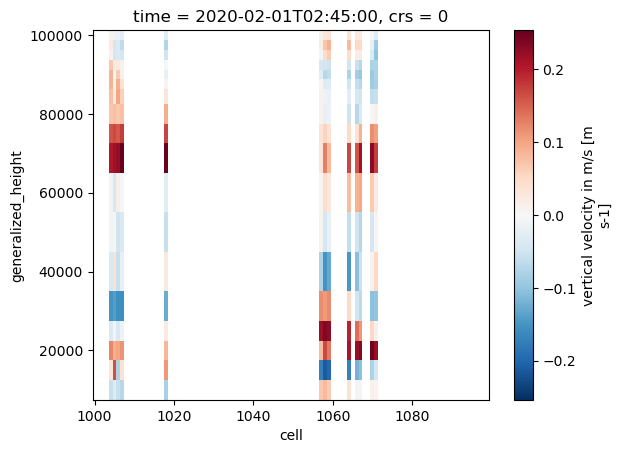

In [49]:
d.wa.where(wmax > 0.2).plot()

In [50]:
idxmax = d.wa.where(wmax>0.2).idxmax('pressure')
idxmax

<xarray.DataArray 'pressure' (cell: 100)> Size: 800B
array([   nan,    nan,    nan,    nan, 70000., 70000., 70000., 70000.,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan, 70000.,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan, 25000., 25000., 25000.,    nan,    nan,    nan,    nan,
       20000.,    nan, 20000., 20000.,    nan,    nan, 20000., 20000.,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan])
Coordinates:
    time     datetime64[ns] 8B 2020-02-01T02:45:00
    crs      int64 8B 0
  * cell     (cell) int64 800B 1000 1001 1002 1003 1004 ... 1096 1097 1098 1099
    lat      (cell) float64 800B 1.026 1.045 1.045 ... 0.8207 0.8207 0.8393
    lon      (cell) float64 800B 44.87 44.89 44.85 44.87 ... 45.86 45.81 45.83

In [5]:
d2 = icon_feb.isel(time=10, ).sel(pressure=slice(10000,100000))
wmax = d2.wa.max('pressure')

In [6]:
idxmax = d2.wa.where(wmax>.5).idxmax('pressure')

In [23]:
hpa = idxmax / 100

<Figure size 640x480 with 0 Axes>

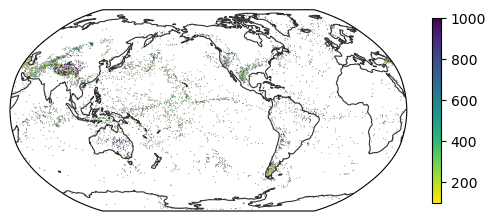

In [24]:
cb = egh.healpix_show(hpa, cmap='viridis_r', )
plt.colorbar(cb, shrink=.5)

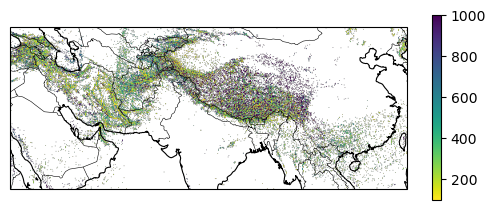

In [25]:
projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent((40,120,15,45), crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)
cb = egh.healpix_show(hpa, cmap='viridis_r', ax=ax)
fig.colorbar(cb, shrink=.5)

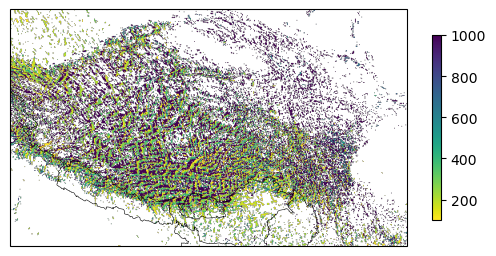

In [34]:
projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent((80,105,25,40), crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)
cb = egh.healpix_show(hpa, cmap='viridis_r', ax=ax)
fig.colorbar(cb, shrink=.5)

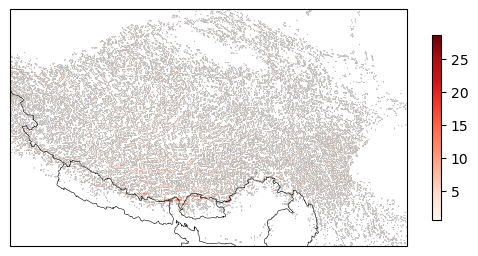

In [53]:
projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent((80,105,25,40), crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)
cb = egh.healpix_show(wmax.where(hpa==1000), cmap='Reds', ax=ax)
fig.colorbar(cb, shrink=.5)

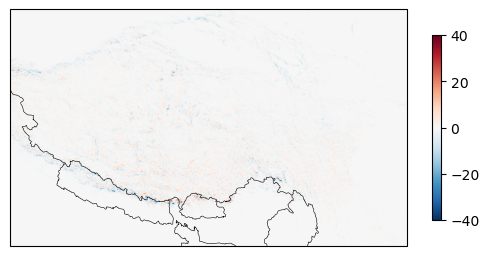

In [58]:
projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent((80,105,25,40), crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)
cb = egh.healpix_show(d2.sel(pressure=100000).wa, cmap='RdBu_r', ax=ax, vmin=-40,vmax=40)
fig.colorbar(cb, shrink=.5)

In [49]:
# subselect Himalayas

# 27°59′N 86°55′E﻿ / ﻿27.983°N 86.917°E
domain_extents = {"hima": (80,105,25,40),}
def cells_of_domain(ds, domain_name):
    lon_min, lon_max, lat_min, lat_max = domain_extents[domain_name]
    cells = ds.cell
    c1 = cells.where(ds.lon>lon_min).where(ds.lon<lon_max).where(ds.lat>lat_min).where(ds.lat<lat_max)
    return c1.dropna('cell')

cells = cells_of_domain(d2, domain_name='hima')
d2_hima = d2.sel(cell=cells)
d2_hima['level'] = hpa.sel(cell=cells)
d2_hima['wmax'] = wmax.sel(cell=cells)

In [45]:
bad = d2_hima.wa.where(d2_hima.level == 1000) # select where pressure of max at 1000 hPa

(100000.0, 10000.0)

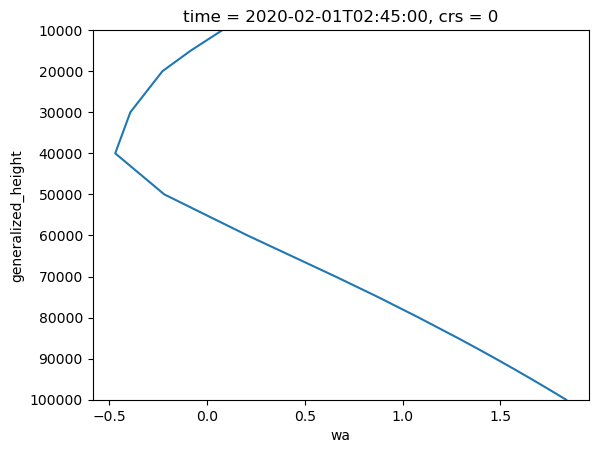

In [62]:
# view
bad.mean('cell').plot(y='pressure')
plt.ylim((100000,10000))